<a href="https://colab.research.google.com/github/enzoampil/fastquant/blob/master/examples/backtest_crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# uncomment to install in colab
# !pip install -e git+https://github.com/enzoampil/fastquant.git@master

# backtest crypto using fastquant

## fetch data from binance

In [2]:
from fastquant import get_crypto_data

crypto = get_crypto_data("BTC/USDT", "2018-12-01", "2019-12-31")

In [4]:
crypto

,open,high,low,close,volume
dt,,,,,
2018-12-01,4041.27,4299.99,3963.01,4190.02,44840.073481
2018-12-02,4190.98,4312.99,4103.04,4161.01,38912.154790
2018-12-03,4160.55,4179.00,3827.00,3884.01,49094.369163
2018-12-04,3884.76,4085.00,3781.00,3951.64,48489.551613
2018-12-05,3950.98,3970.00,3745.00,3769.84,44004.799448
...,...,...,...,...,...
2019-12-27,7202.00,7275.86,7076.42,7254.74,33642.701861
2019-12-28,7254.77,7365.01,7238.67,7316.14,26848.982199
2019-12-29,7315.36,7528.45,7288.00,7388.24,31387.106085


In [5]:
import matplotlib as mpl
mpl.style.use("default")

## run backtest with a grid of values

In [ ]:
from fastquant import backtest

results = backtest('smac', 
                   crypto, 
                   fast_period=[7,14,21,28], 
                   slow_period=[30,45,60,75],
                   plot=False,
                   verbose=False
                  )

In [7]:
results.head()

,init_cash,buy_prop,sell_prop,execution_type,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,sharperatio,pnl,final_value
0,100000,1,1,close,7,75,0.948852,0.002396,0.829083,82.908348,0.987364,158274.34,258274.33860
1,100000,1,1,close,28,60,0.931215,0.002352,0.808669,80.866904,0.986993,153759.00,253758.99660
2,100000,1,1,close,14,75,0.831271,0.002099,0.697218,69.721824,0.984571,129623.52,229623.51945
3,100000,1,1,close,21,75,0.782368,0.001976,0.645214,64.521440,0.983146,118664.47,218664.46810
4,100000,1,1,close,28,75,0.769282,0.001943,0.631571,63.157054,0.982732,115821.60,215821.60410


That's a 258% maximum profit using only SMAC!

In [8]:
#get best parameters on top row 
fast_best, slow_best = results.iloc[0][["fast_period","slow_period"]]
fast_best, slow_best

(7, 75)

## run backtest using optimum values

===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
fast_period : 7
slow_period : 75
Final PnL: 158274.34
Time used (seconds): 0.08148503303527832
Optimal parameters: {'init_cash': 100000, 'buy_prop': 1, 'sell_prop': 1, 'execution_type': 'close', 'fast_period': 7, 'slow_period': 75}
Optimal metrics: {'rtot': 0.9488521619078212, 'ravg': 0.0023960913179490433, 'rnorm': 0.8290834824298609, 'rnorm100': 82.90834824298608, 'sharperatio': 0.9873637127933005, 'pnl': 158274.34, 'final_value': 258274.33860000005}


<IPython.core.display.Javascript object>


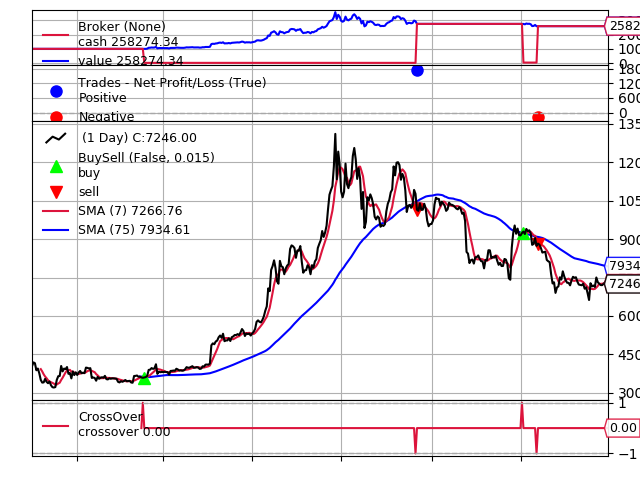

In [10]:
results = backtest('smac', 
                   crypto, 
                   fast_period=fast_best, 
                   slow_period=slow_best,
                   plot=True,
                   verbose=False
                  )